#**Advanced** **Hemodialysis** **Optimization** : **Data**-**Driven** **Approach** **to** **Urea** **Clearance** **and** **Patient** **Recovery**


**Description:**


This project focuses on optimizing hemodialysis treatment by analyzing clinical data from 5,000 patients. It aims to identify key factors affecting urea clearance and overall treatment effectiveness. Advanced data analytics and modeling are used to personalize dialysis strategies. The project explores the integration of nanotechnology to support faster urea reduction and patient recovery. Ultimately, it seeks to enhance outcomes and quality of life for individuals undergoing dialysis.

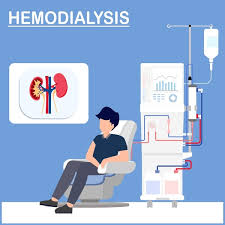

**About Dataset:**

This hemodialysis dataset provides detailed information about patients undergoing dialysis treatment. It typically includes personal details like age and weight, clinical measurements such as blood pressure and heart rate, and laboratory test results like urea and creatinine levels before and after dialysis. The dataset may also contain dialysis session details—like duration, frequency, and flow rates—which are important for understanding how the treatment is administered. By analyzing these variables, researchers or clinicians can assess how effective each dialysis session is in removing waste from the blood. This kind of data is valuable for improving patient outcomes and personalizing treatment plans.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder as le
from sklearn.preprocessing import OneHotEncoder as ohe
from sklearn.preprocessing import PowerTransformer
from scipy.stats import skew
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
hemodialysis_data=pd.read_csv("/content/Hemodialysis_Data 2.csv")

In [ ]:
df=pd.DataFrame(hemodialysis_data)

**Statiscal Measures:**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             5000 non-null   int64  
 1   Gender                          5000 non-null   object 
 2   Weight                          5000 non-null   float64
 3   Diabetes                        5000 non-null   bool   
 4   Hypertension                    5000 non-null   bool   
 5   Kidney Failure Cause            5000 non-null   object 
 6   Pre-Dialysis Blood Pressure     5000 non-null   int64  
 7   During-Dialysis Blood Pressure  5000 non-null   int64  
 8   Post-Dialysis Blood Pressure    5000 non-null   int64  
 9   Heart Rate                      5000 non-null   int64  
 10  Creatinine                      5000 non-null   float64
 11  Urea                            5000 non-null   float64
 12  Potassium                       50

In [ ]:
df.shape

(5000, 27)

In [ ]:
df.columns

Index(['Age', 'Gender', 'Weight', 'Diabetes', 'Hypertension',
       'Kidney Failure Cause', 'Pre-Dialysis Blood Pressure',
       'During-Dialysis Blood Pressure', 'Post-Dialysis Blood Pressure',
       'Heart Rate', 'Creatinine', 'Urea', 'Potassium', 'Hemoglobin',
       'Hematocrit', 'Albumin', 'Dialysis Duration (hours)',
       'Dialysis Frequency (per week)', 'Dialysate Composition',
       'Vascular Access Type', 'Dialyzer Type', 'Kt/V', 'URR',
       'Urine Output (ml/day)', 'Dry Weight (kg)',
       'Fluid Removal Rate (ml/hour)', 'Disease Severity'],
      dtype='object')

In [ ]:
df.describe()

,Age,Weight,Pre-Dialysis Blood Pressure,During-Dialysis Blood Pressure,Post-Dialysis Blood Pressure,Heart Rate,Creatinine,Urea,Potassium,Hemoglobin,Hematocrit,Albumin,Dialysis Duration (hours),Dialysis Frequency (per week),Kt/V,URR,Urine Output (ml/day),Dry Weight (kg),Fluid Removal Rate (ml/hour)
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,53.433200,84.640320,139.812000,125.127600,109.769000,79.48040,5.491776,57.259880,4.507120,11.479880,37.470440,3.99978,4.006300,2.013800,1.502174,70.01120,497.903800,80.329720,350.067540
std,20.931669,20.285619,23.294737,20.037006,17.402937,11.53193,2.589487,24.692911,0.575339,2.014652,4.321661,0.57736,0.581761,0.820819,0.287894,2.88729,290.754627,20.382646,85.854451
min,18.000000,50.000000,100.000000,90.000000,80.000000,60.00000,1.000000,15.000000,3.500000,8.000000,30.000000,3.00000,3.000000,1.000000,1.000000,65.00000,0.000000,45.000000,200.000000
25%,35.000000,66.900000,119.000000,108.000000,95.000000,70.00000,3.230000,35.700000,4.000000,9.700000,33.700000,3.50000,3.500000,1.000000,1.260000,67.50000,244.000000,62.700000,275.875000
50%,53.000000,84.200000,140.000000,125.000000,110.000000,80.00000,5.505000,57.500000,4.500000,11.500000,37.500000,4.00000,4.000000,2.000000,1.500000,70.00000,493.000000,80.200000,353.500000
75%,72.000000,102.300000,160.000000,142.000000,125.000000,89.25000,7.722500,78.900000,5.000000,13.200000,41.200000,4.50000,4.500000,3.000000,1.750000,72.50000,748.000000,98.100000,423.000000
max,89.000000,120.000000,179.000000,159.000000,139.000000,99.00000,9.990000,100.000000,5.500000,15.000000,45.000000,5.00000,5.000000,3.000000,2.000000,75.00000,999.000000,115.000000,499.900000



**Handling missing values:**

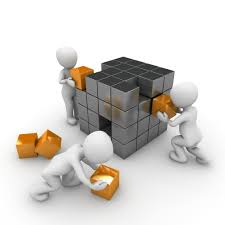

In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Weight,0
Diabetes,0
Hypertension,0
Kidney Failure Cause,0
Pre-Dialysis Blood Pressure,0
During-Dialysis Blood Pressure,0
Post-Dialysis Blood Pressure,0
Heart Rate,0




*   There are no missing values in this dataset; all fields are fully populated for every patient record.







**Handling duplicates:**

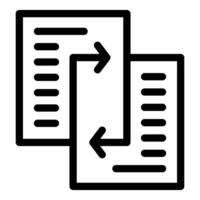

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df=df.drop_duplicates()



*   Duplicate records were checked : to ensure the uniqueness and integrity of the data.




**Encoding:**

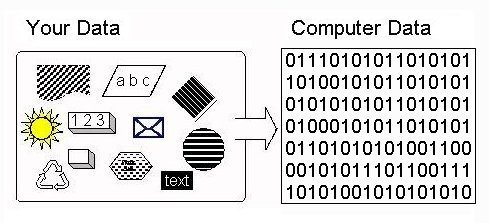

In [ ]:
categorical_cols = [
    "Gender",
    "Kidney Failure Cause",
    "Dialysate Composition",
    "Vascular Access Type",
    "Dialyzer Type",
    "Disease Severity"
]
oh = OneHotEncoder(sparse_output=False)
for col in categorical_cols:
    reshaped = df[col].values.reshape(-1, 1)
    encoded = oh.fit_transform(reshaped)
    encoded_df = pd.DataFrame(encoded, columns=[f"{col}_{cat}" for cat in oh.categories_[0]], dtype=int)
    df = pd.concat([df, encoded_df], axis=1)
    df.drop(columns=[col], inplace=True)
df.to_csv("encoded_hemodialysis_dataset.csv", index=False)
print(df.head())


   Age  Weight  Diabetes  Hypertension  Pre-Dialysis Blood Pressure  \
0   62    97.4      True          True                          103   
1   65    72.7      True         False                          164   
2   82   111.6     False          True                          102   
3   85    60.0     False         False                          155   
4   85    52.1     False         False                          140   

   During-Dialysis Blood Pressure  Post-Dialysis Blood Pressure  Heart Rate  \
0                             133                            84          78   
1                             132                            84          68   
2                             126                           115          62   
3                             115                            99          89   
4                             152                           124          75   

   Creatinine  Urea  ...  Dialysate Composition_Customized  \
0        5.77  51.3  ...            



*   Categorical features in the dataset were one-hot encoded using OneHotEncoder from scikit-learn to convert them into binary format. The original columns were then dropped, and the encoded dataset was saved for further analysis.



**Outliers:**

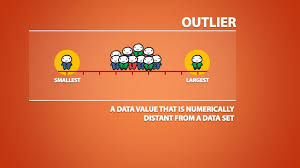

In [ ]:
num_columns=df.select_dtypes(include='number')
num_columns.head()

,Age,Weight,Pre-Dialysis Blood Pressure,During-Dialysis Blood Pressure,Post-Dialysis Blood Pressure,Heart Rate,Creatinine,Urea,Potassium,Hemoglobin,Hematocrit,Albumin,Dialysis Duration (hours),Dialysis Frequency (per week),Kt/V,URR,Urine Output (ml/day),Dry Weight (kg),Fluid Removal Rate (ml/hour)
0,62,97.4,103,133,84,78,5.77,51.3,5.3,10.8,31.1,4.1,4.5,3,1.18,66.6,146,105.8,439.7
1,65,72.7,164,132,84,68,2.74,87.5,3.9,13.8,36.0,4.0,4.2,2,1.67,74.2,723,79.0,364.1
2,82,111.6,102,126,115,62,7.38,74.7,4.3,14.3,33.0,4.4,4.2,3,1.84,65.3,495,114.2,337.9
3,85,60.0,155,115,99,89,3.48,91.5,4.9,14.6,31.5,4.0,3.5,3,1.87,67.4,36,66.8,223.6
4,85,52.1,140,152,124,75,3.23,38.8,4.5,12.5,33.5,3.6,4.0,3,1.84,68.4,797,106.9,359.2


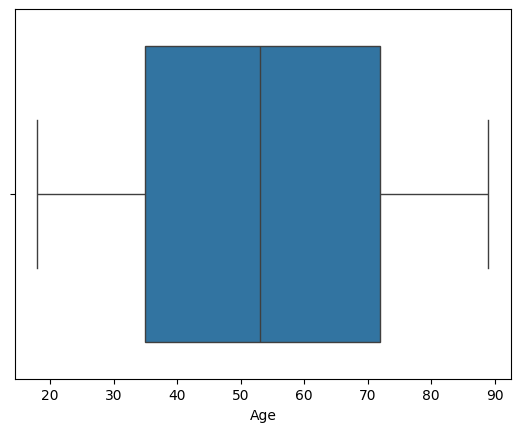

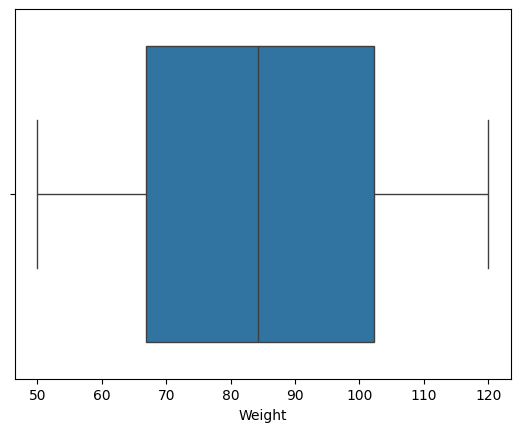

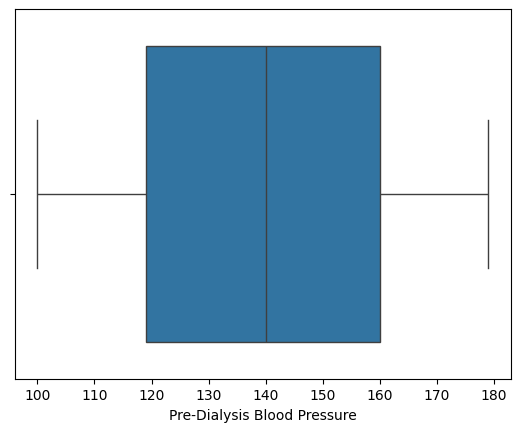

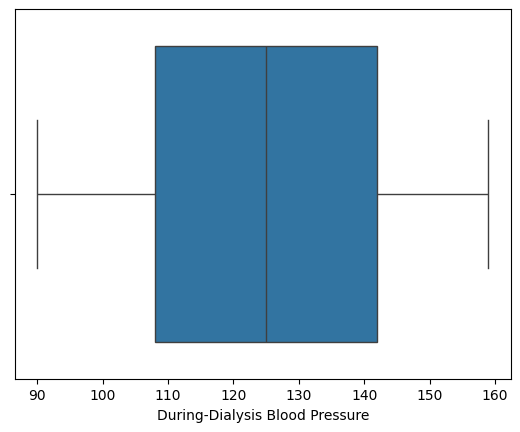

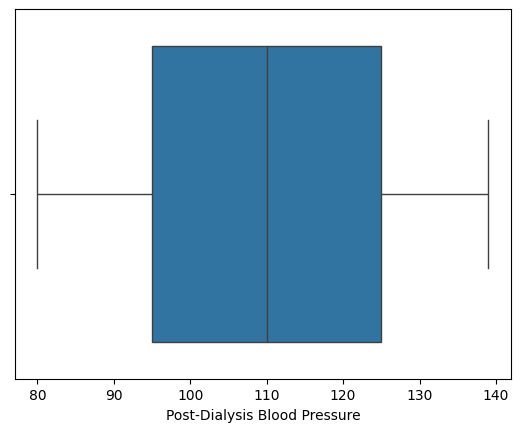

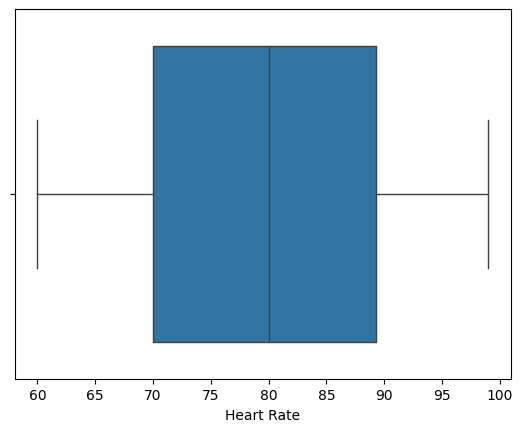

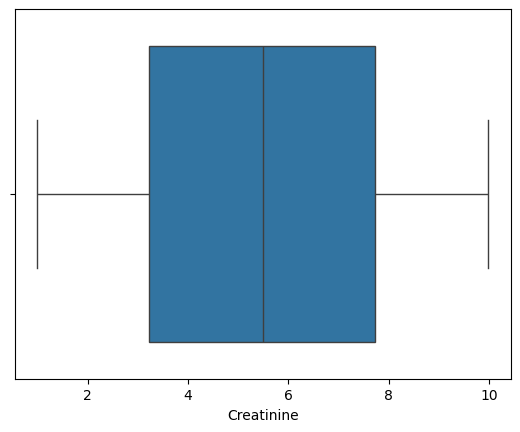

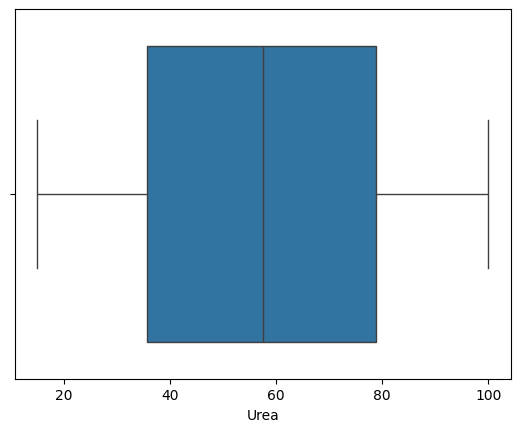

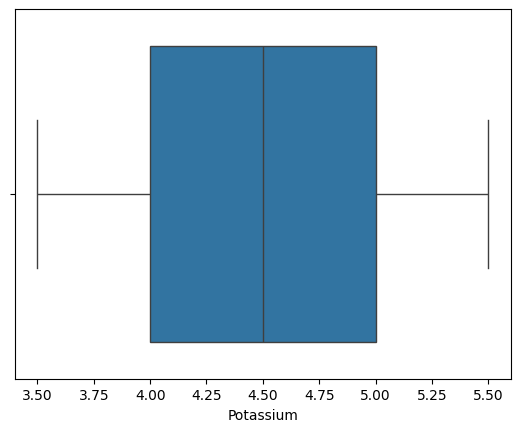

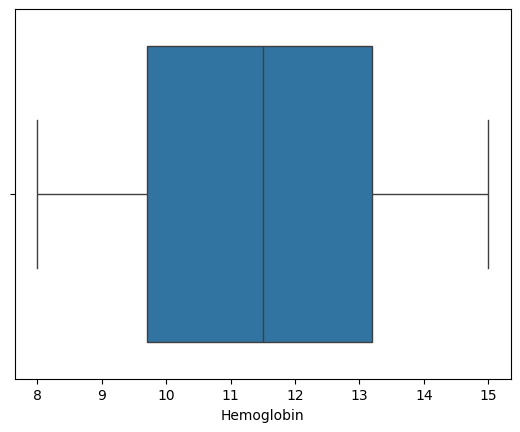

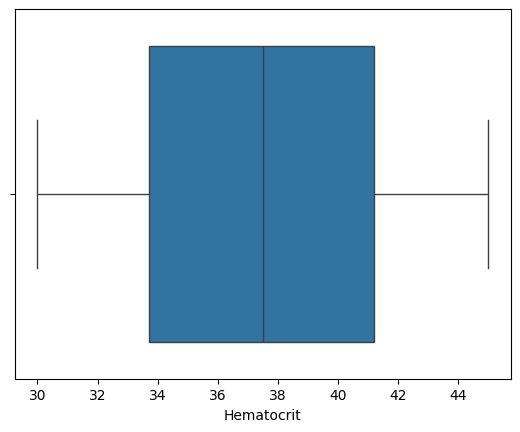

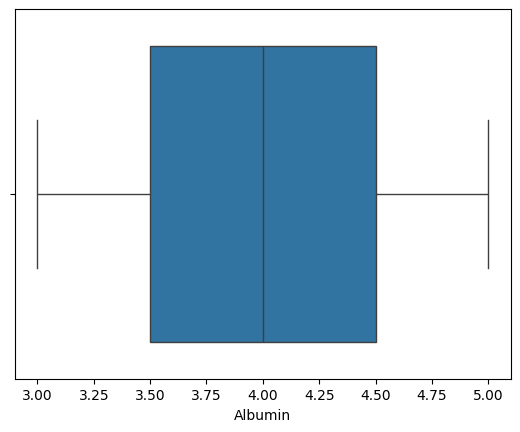

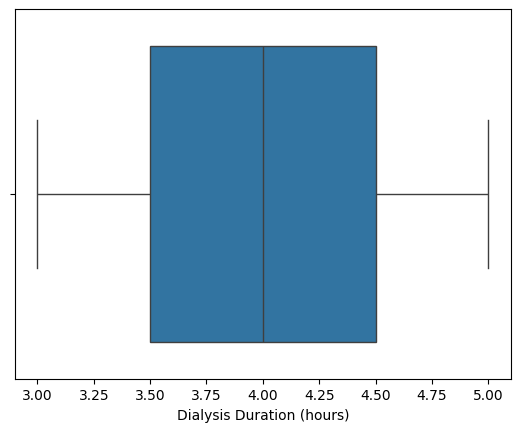

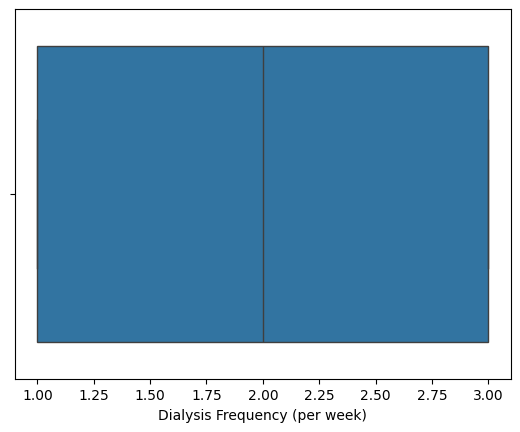

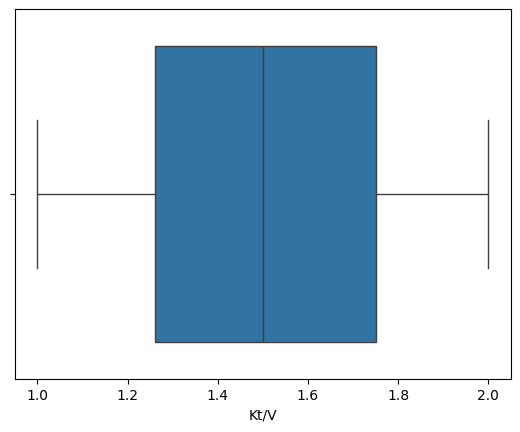

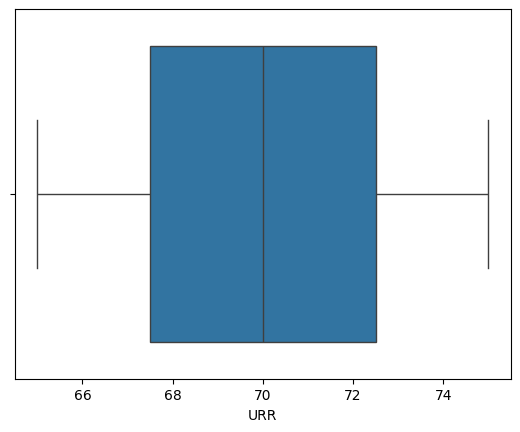

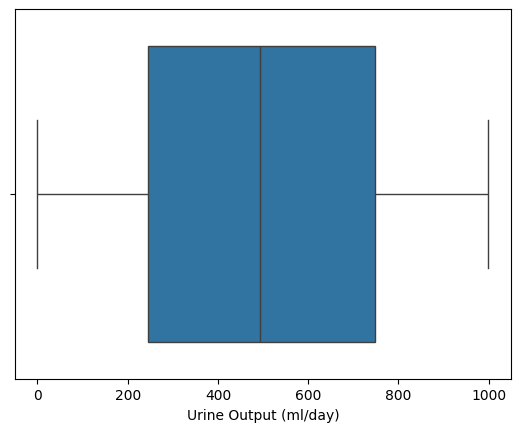

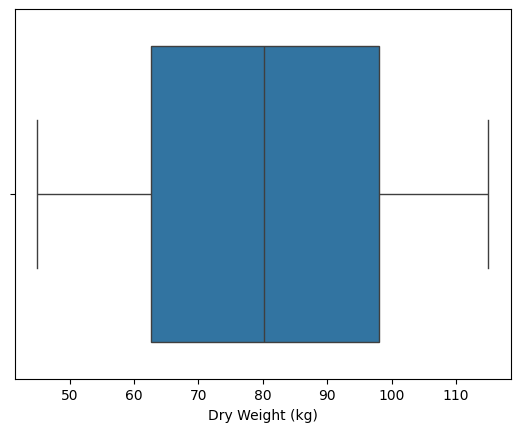

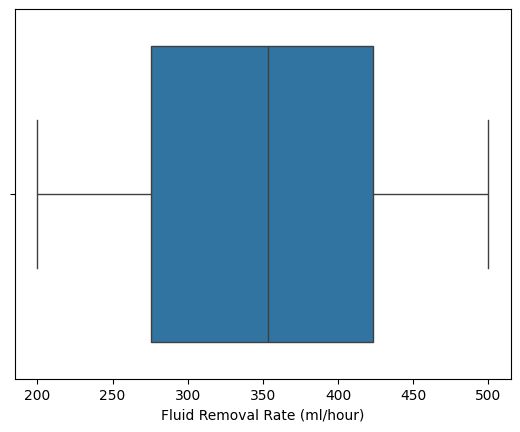

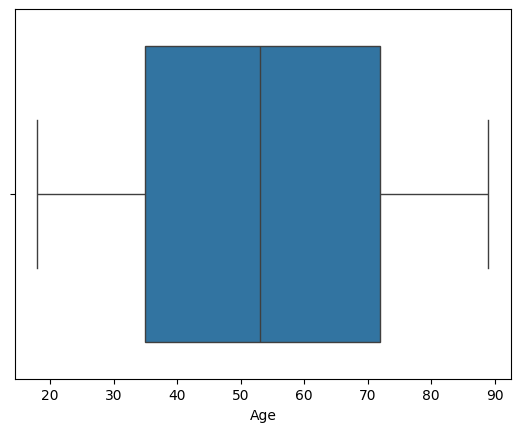

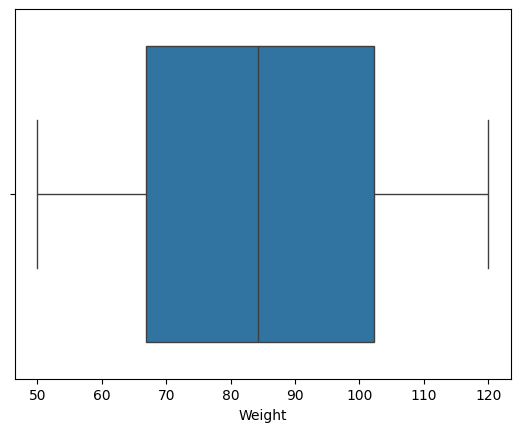

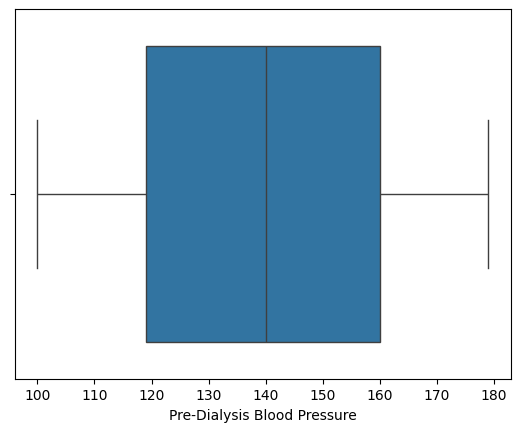

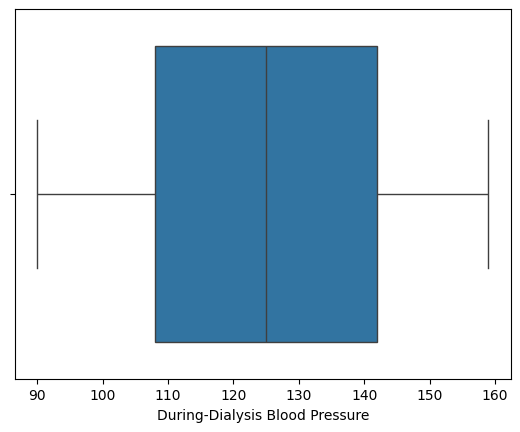

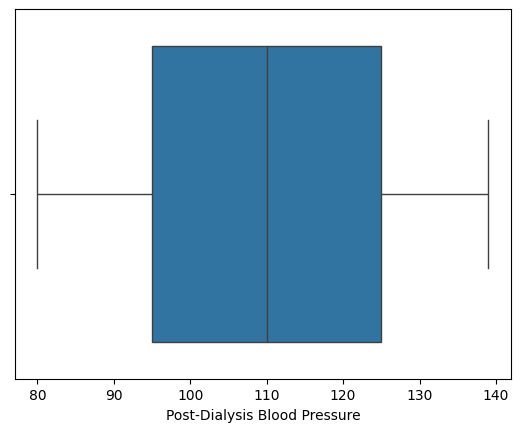

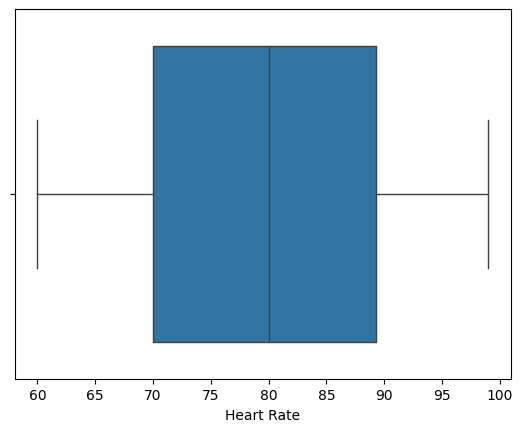

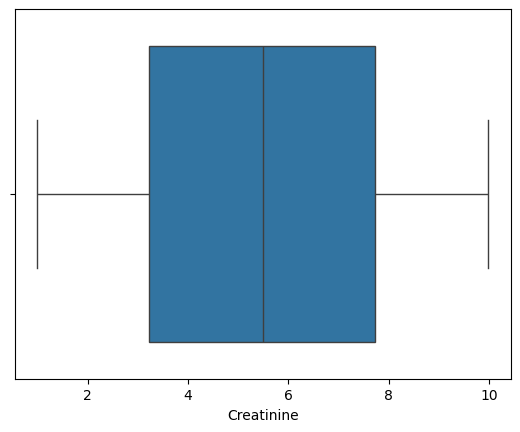

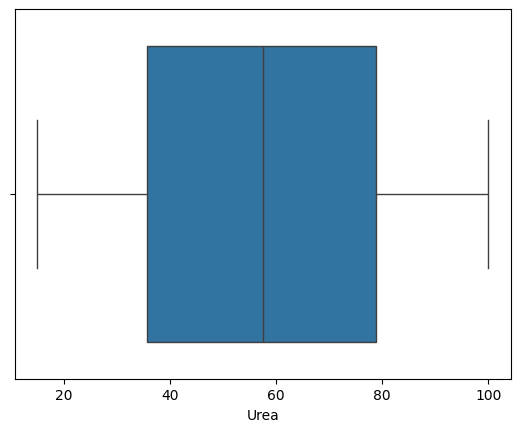

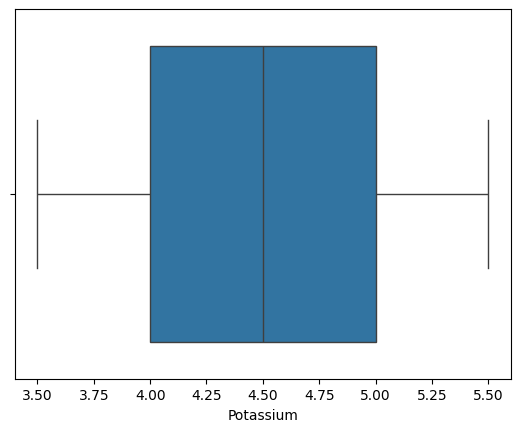

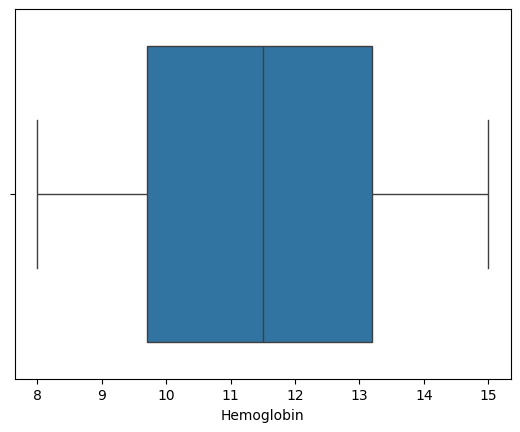

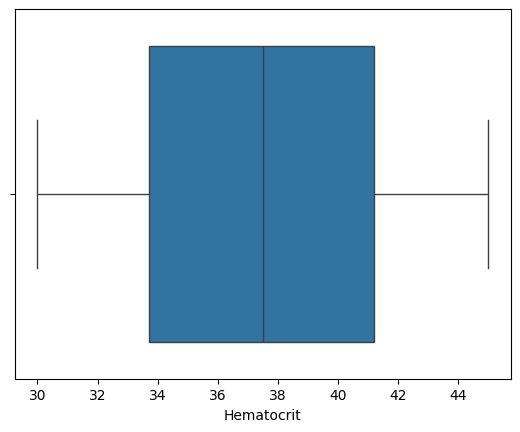

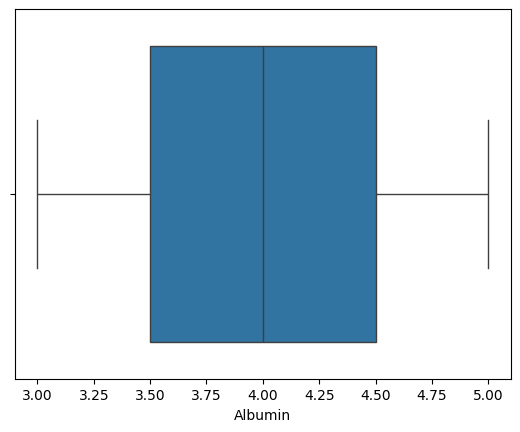

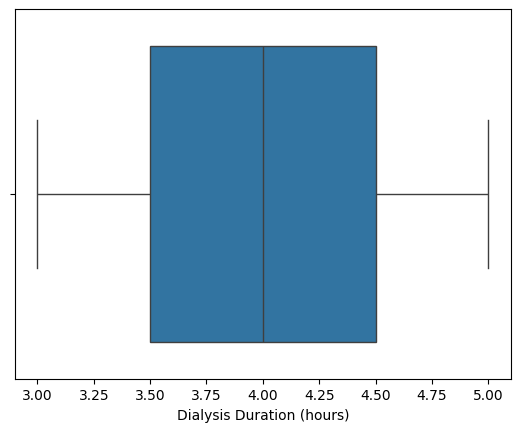

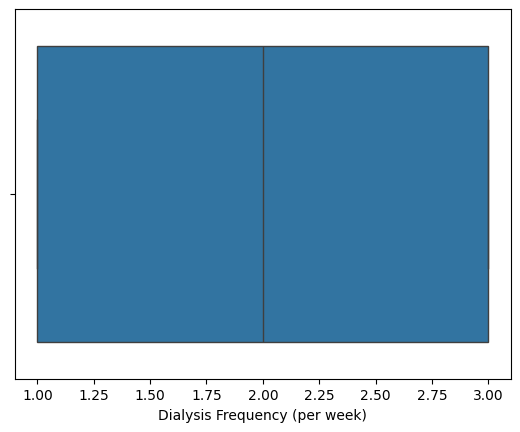

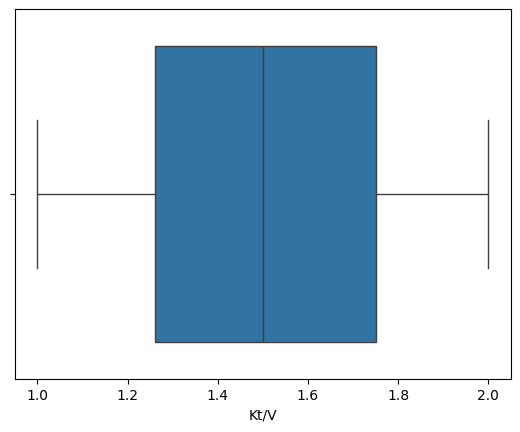

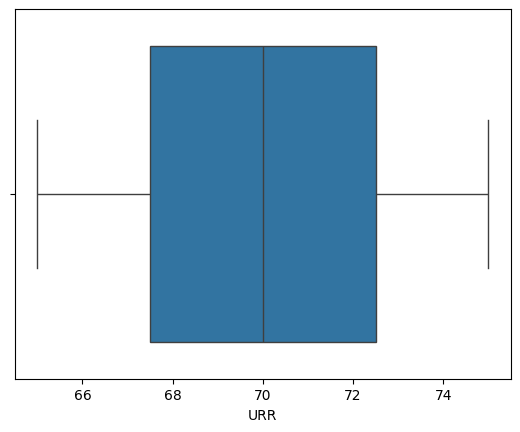

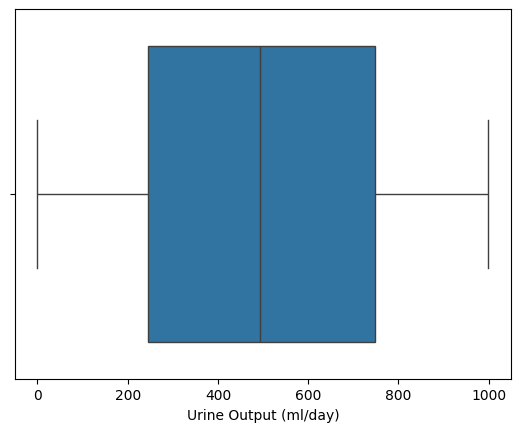

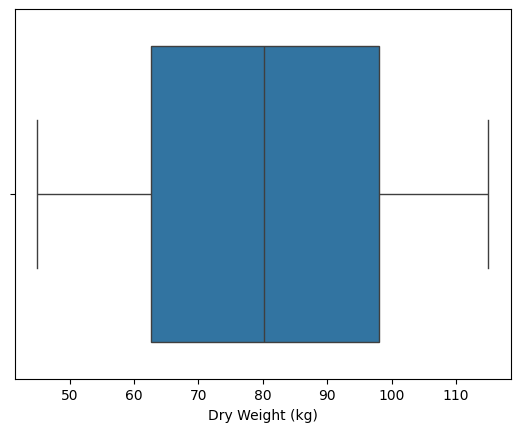

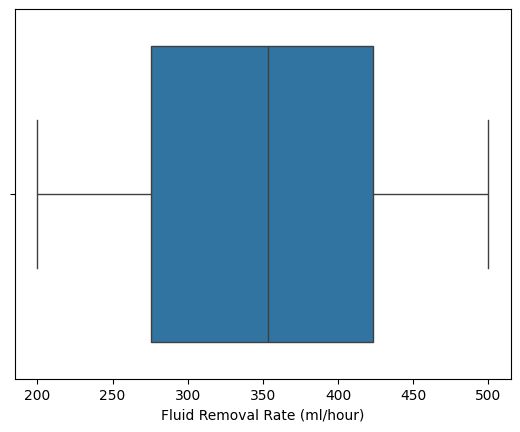

In [ ]:
for columns in num_columns.columns:
  sns.boxplot(data=num_columns,x=columns)
  plt.show()
def handling_outliers(df):
  for col in df.select_dtypes(include='number').columns:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    iqr=Q3-Q1
for columns in num_columns.columns:
  sns.boxplot(data=num_columns,x=columns)
  plt.show()
def handling_outliers(df):
  for col in df.select_dtypes(include='number').columns:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    iqr=Q3-Q1
    lower_bound=Q1-(1.5*iqr)
    upper_bound=Q3+(1.5*iqr)
    df[col]=df[col].apply(lambda x:lower_bound if x<lower_bound else upper_bound if x>upper_bound else x)
    return df

<Axes: >

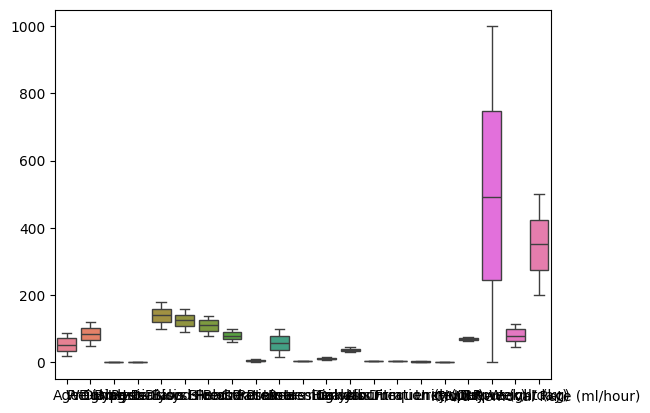

In [ ]:
df1=handling_outliers(df)
df1.head()
sns.boxplot(df1)



*  Outliers were detected using the Interquartile Range (IQR) method, where values below Q1 - 1.5*IQR or above Q3 + 1.5*IQR were considered outliers. These extreme values were then capped to the nearest boundary (lower or upper bound) to reduce their impact while preserving the data structure. Boxplots were also used to visually identify outliers in numerical columns.



**Visualization:**

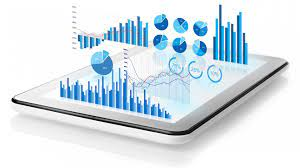

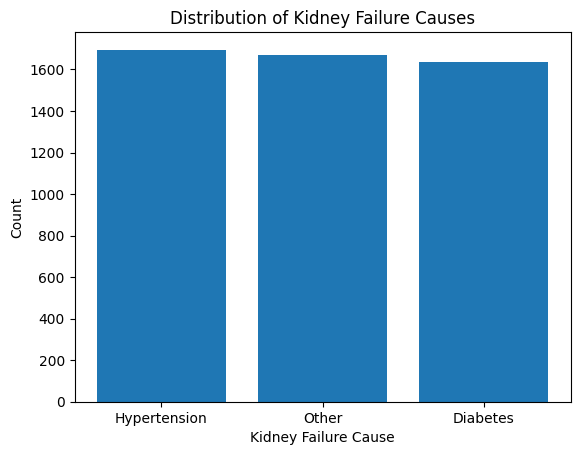

In [ ]:
cause_counts=df['Kidney Failure Cause'].value_counts()
plt.bar(cause_counts.index,cause_counts.values)
plt.xlabel('Kidney Failure Cause')
plt.ylabel('Count')
plt.title('Distribution of Kidney Failure Causes')
plt.show()

The bar chart shows that hypertension is the leading cause of kidney failure in the dataset, followed closely by other causes and diabetes, indicating that all three contribute significantly to the condition.


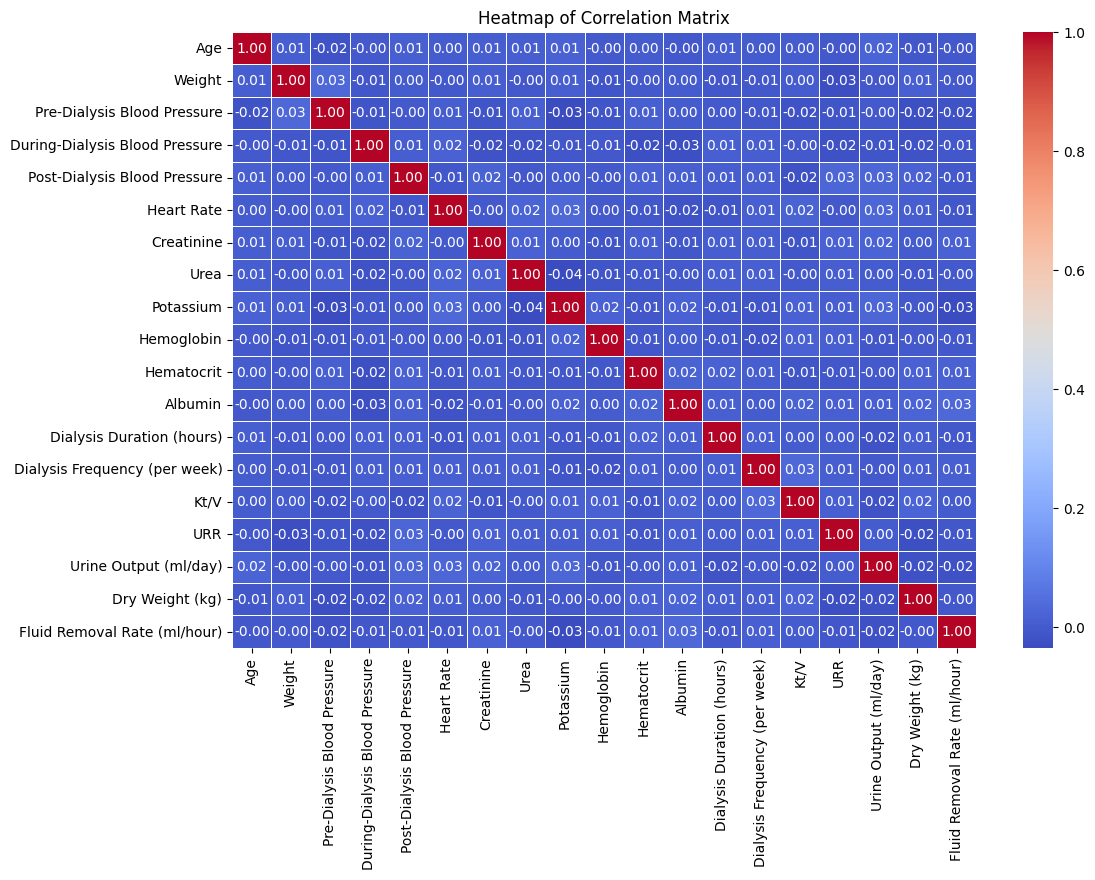

In [ ]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numerical_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()


The heatmap shows that most numerical features in the dataset have very low correlation with each other, indicating minimal linear relationships and low multicollinearity among variables.

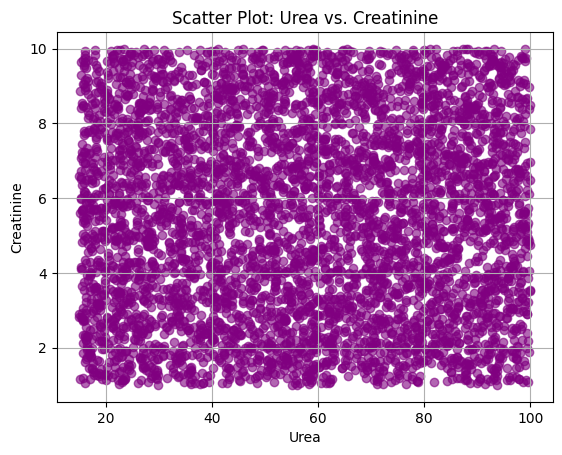

In [ ]:
plt.scatter(df['Urea'], df['Creatinine'], color='purple', alpha=0.6)
plt.xlabel('Urea')
plt.ylabel('Creatinine')
plt.title('Scatter Plot: Urea vs. Creatinine')
plt.grid(True)
plt.show()

This scatter plot visualizes the relationship between **Urea** and **Creatinine** levels in patients. The wide and uniform spread of points suggests **no strong linear correlation** between the two variables.

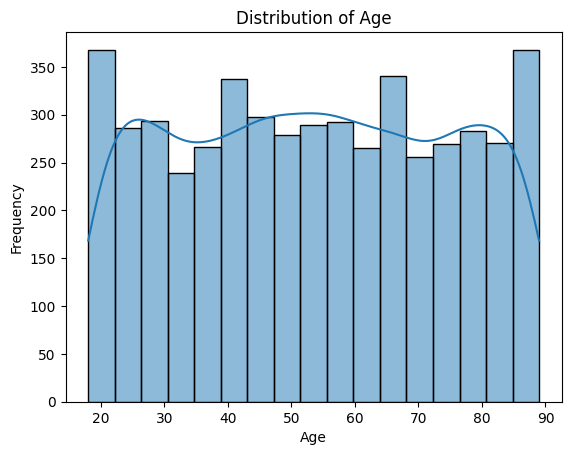

In [ ]:
sns.histplot(data=df,x='Age',kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

This histplot plot shows the frequency of patients across different age groups. It shows a fairly uniform age distribution with slight peaks around 20, 40, 65, and 88 years, suggesting a balanced representation of ages in the dataset.

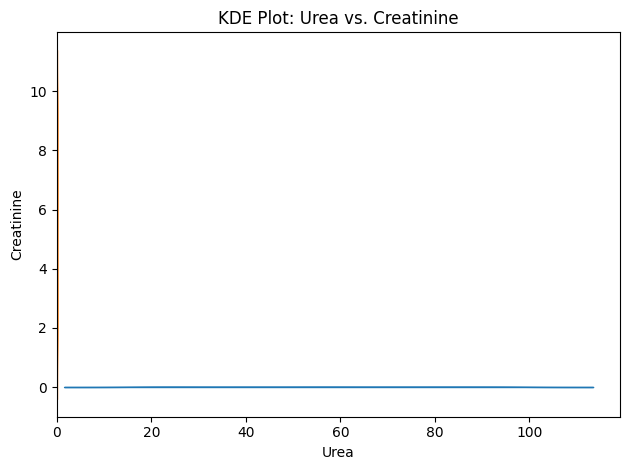

In [ ]:
sns.kdeplot(x=df['Urea'],fill=True)
sns.kdeplot( y=df['Creatinine'], fill=True)
plt.xlabel('Urea')
plt.ylabel('Creatinine')
plt.title('KDE Plot: Urea vs. Creatinine')
plt.tight_layout()
plt.show()


This KDE plot aims to show the relationship between urea and creatinine levels but appears to be incorrect. The creatinine values are all flat at zero, indicating either missing or constant data, or a misapplication of the KDE method.





*    visualizations like histplots, bar charts, scatter plots,kde plot and heatmaps were used to explore data distribution, category-wise comparisons, variable relationships, and feature correlations effectively.





**Skewness:**

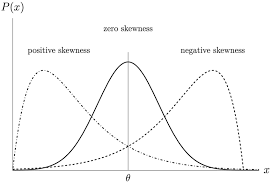

In [ ]:
skewness = df[['Urea', 'Creatinine']].skew()
print(skewness)


Urea         -0.013599
Creatinine    0.017058
dtype: float64


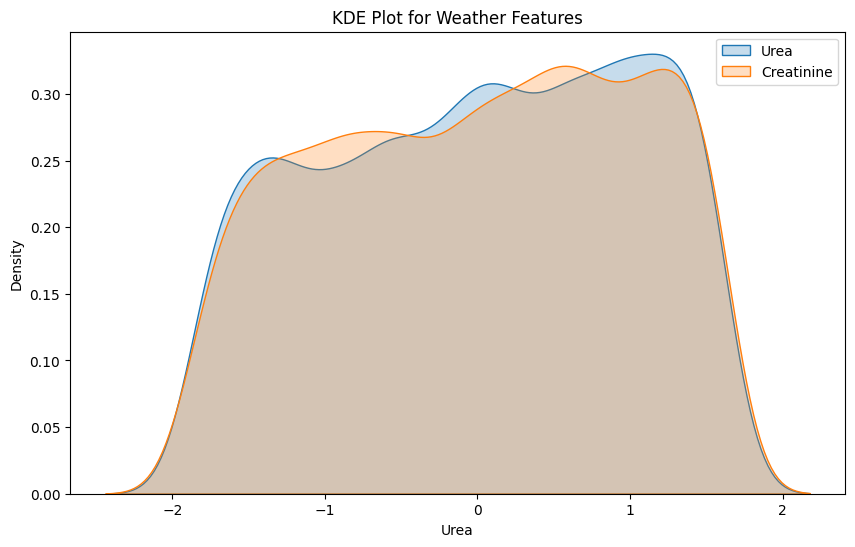

Age Skewness: 0.0049
Weight Skewness: 0.0172
Pre-Dialysis Blood Pressure Skewness: -0.0127
During-Dialysis Blood Pressure Skewness: -0.0157
Post-Dialysis Blood Pressure Skewness: -0.0365
Heart Rate Skewness: 0.0036
Creatinine Skewness: -0.1317
Urea Skewness: -0.1537
Potassium Skewness: -0.0174
Hemoglobin Skewness: 0.0049
Hematocrit Skewness: -0.0034
Albumin Skewness: 0.0131
Dialysis Duration (hours) Skewness: -0.0081
Dialysis Frequency (per week) Skewness: -0.0255
Kt/V Skewness: -0.0130
URR Skewness: 0.0097
Urine Output (ml/day) Skewness: 0.0100
Dry Weight (kg) Skewness: -0.0281
Fluid Removal Rate (ml/hour) Skewness: -0.0217


In [ ]:
cols_to_transform = ['Urea', 'Creatinine']
pt = PowerTransformer(method='yeo-johnson')
df[cols_to_transform] = pt.fit_transform(df[cols_to_transform])
plt.figure(figsize=(10, 6))
sns.kdeplot(df["Urea"], label="Urea", fill=True)
sns.kdeplot(df["Creatinine"], label="Creatinine", fill=True)
plt.legend()
plt.title("KDE Plot for Weather Features")
plt.show()
for col in df.select_dtypes(include=['number']).columns:
    print(f"{col} Skewness: {skew(df[col]):.4f}")



*  This plot shows a valid KDE comparison between standardized urea and creatinine values. The smooth, overlapping curves indicate that both variables were likely normalized (mean ~0, similar spread), and the KDE was properly applied to show their density distributions.

**Feature selection:**

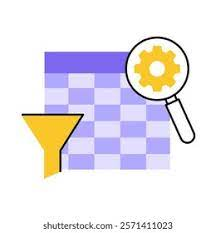

In [ ]:
x = df_encoded.drop(columns=['Urea'], axis=1)
y = df_encoded['Urea']
selecter = SelectKBest(score_func=f_regression, k=14)
x_new = selecter.fit_transform(x, y)
selected_features = x.columns[selecter.get_support()]
selected_scores = selecter.scores_[selecter.get_support()]
features_score = pd.DataFrame({'Features': selected_features, 'Score': selected_scores})
features_score = features_score.sort_values(by='Score', ascending=False)
print(features_score)

                             Features        Score
13            Disease Severity_Severe  3025.915889
12          Disease Severity_Moderate  2074.395573
11              Disease Severity_Mild   318.059199
5                           Potassium     6.308521
1                        Hypertension     4.378764
0                            Diabetes     2.704832
3                          Heart Rate     2.390631
10         Vascular Access Type_Graft     1.778916
9       Vascular Access Type_Catheter     1.596465
2      During-Dialysis Blood Pressure     1.370947
4                          Creatinine     1.110564
6                          Hemoglobin     1.070130
8          Kidney Failure Cause_Other     0.895988
7   Kidney Failure Cause_Hypertension     0.811991




*   Feature selection was done using **SelectKBest** with **f_regression**, which scores features based on their correlation with the target variable (Urea). The top 14 features with the highest scores were selected for the model.



**Train Test split:**

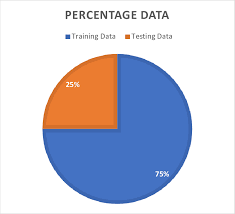

In [ ]:
x_selected=x[selected_features]
x_selected.columns
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 35)
(1000, 35)
(4000,)
(1000,)


In this we selects the top features from the dataset and splits the data into training and testing sets. It uses an 80-20 split, where 80% of the data is used for training and 20% for testing, ensuring reproducibility with `random_state=42`.



**Scaling:**

In [ ]:
Ss = StandardScaler()
x_test_scaled = Ss.fit_transform(x_test)
x_train_scaled = Ss.fit_transform(x_train)



*   This code scales the training data by removing the mean and scaling to unit variance using `StandardScaler`. It then uses the same scaling parameters to transform the test data, preventing data leakage.



**Model building:**

In [ ]:
print("\nTraining model")
regressors = {
    'Linear Regression': LinearRegression(),
    'Support Vector Machine': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}
result = {}
for name, reg in regressors.items():
  print(f"\nTraining {name}...")
  reg.fit(x_train_scaled, y_train)
  y_pred = reg.predict(x_test_scaled)
  result[name]={
     'mse': mean_squared_error(y_test, y_pred),
     'mae': mean_absolute_error(y_test, y_pred),
     'r2': r2_score(y_test, y_pred)
  }
print("\nModel Performance")
for model_name,metrics in result.items():
  print(f"\n{model_name}")
  for metric_name,metric_value in metrics.items():
    print(f"{metric_name}:{metric_value}")



Training model

Training Linear Regression...

Training Support Vector Machine...

Training Decision Tree...

Training Random Forest...

Model Performance

Linear Regression
mse:357.83792711157724
mae:15.019441251970315
r2:0.3991556879302446

Support Vector Machine
mse:370.2985079272093
mae:15.340454933000368
r2:0.37823317373899856

Decision Tree
mse:641.97549
mae:19.089100000000002
r2:-0.07793862089532144

Random Forest
mse:329.149630752
mae:14.209856
r2:0.44732609800879597




*   This method trains four regression models (Linear Regression, SVM, Decision Tree, Random Forest) on scaled training data and evaluates them using MSE, MAE, and R² score on test data. It then prints the performance metrics for each model.



In [ ]:
print("The Best Model is : Linear Regression")

The Best Model is : Linear Regression
